<a href="https://colab.research.google.com/github/paulohenriqueviegasmartins/webscraping_using_python/blob/main/Web_Scraping_com_Pyhton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Web Scraping**

Web Scraping é um processo utilizado amplamente nas área de ciência e engenharia de dados para "raspar" ou “garimpar” websites da internet. O principal objetivo é extrair informações importantes de alguns site que posteriormente serão analisadas. Na grande maioria das vezes, esses são dados utilizados para planejamento e tomada de decisões em muitas empresas.


Esse processo pode ser manual ou automatizado utilizando orquestradores de pipelines de dados. O Airflow pode ser utilizado para essa automatização.

Neste repositório, apresentamos uma forma simples de web scraping para buscar informações do site do Tesouro Direto. Ressaltamos que essas informações financeiras são muito importantes para tomada de decisões sobre diversos investimentos em Renda Fixa.

Tesouro Direto: https://www.tesourodireto.com.br/titulos/precos-e-taxas.htm#0

### Instalar bibliotecas

Vamos instalar todos as bibliotecas que utilizaremos

In [2]:
import pandas as pd
import numpy as np
# Configuração da exibição do Dataframe
pd.set_option("display.max_colwidth", 140) # Configura as colunas
pd.set_option("display.min_rows", 20) # Configura as linhas do meu dataframe.

### Outras bibliotecas

Vamos instalar a biblioteca Matplotlib, responsável pela visualização dos dados.

In [3]:
import matplotlib # Importar o Matplotlib para visualização dos dados
matplotlib.style.use('seaborn-darkgrid') # Vamos usar um estilo predefinido (https://matplotlib.org/tutorials/introductory/customizing.html).
matplotlib.rcParams['figure.figsize'] = (20,10) # configurar o tamnho das figuras.

# Importar o plotly para criar os nossos gráficos (https://matplotlib.org/tutorials/introductory/pyplot.html)
import matplotlib.pyplot as plt # Boa prática é a usar a sigla "plt"
import plotly.graph_objects as go # importar a biblioteca para criar os objetos gráficos.
import plotly.express as px # O plotly.express contém funções para criar figuras inteiras de uma vez.
# Sugerimos a padronização de cada uma das siglas utilizadas para as bibliotecas e seus módulos.

### Web Scraping - Coletando dados

Vamos instalar o yfinance: https://pypi.org/project/yfinance/

In [ ]:
# Instalar o Yahoo Finance
# yfinance busca fazer o download dos dados do Yahoo! finance (https://pypi.org/project/yfinance/).
!pip install yfinance
import yfinance as yf # Sempre usar yf para esta biblioteca.

In [5]:
# Programação específica apenas para o Google Colaboratory
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
# Função para buscar dados do Tesouro Direto.
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

In [7]:
titulos = busca_titulos_tesouro_direto() # Criamos os títulos e adicionamos "busca_titulos_tesouro_direto()" a este.

**Pronto!** O web scraping já foi finalizado e todas as informaçẽs do Tesouro Direto importadas.

Vamos explorar as informações e verificar se estão corretas

 
  
  

## Análise dos Dados

In [8]:
# Ver os dados das 5 primeiras colunas e 5 primeiras linhas
titulos.head(10)

Taxa Compra Manha  ...  PU Base Manha
Tipo Titulo                            Data Vencimento Data Base                      ...               
Tesouro Prefixado com Juros Semestrais 2021-01-01      2010-06-07              12.46  ...         902.76
Tesouro Selic                          2011-03-16      2010-06-08               0.00  ...        4247.22
                                       2012-03-07      2010-06-08               0.00  ...        4246.07
                                       2013-03-07      2010-06-08               0.00  ...        4244.06
                                       2014-03-07      2010-06-08               0.00  ...        4241.20
                                       2015-03-07      2010-06-08               0.00  ...        4239.49
Tesouro Prefixado                      2010-07-01      2010-06-08              10.02  ...         993.56
                                       2011-01-01      2010-06-08              10.98  ...         941.62
                                       2012-01-01      2010-06-08              11.91  ...         837.33
                                       2013-01-01      2010-06-08              12.09  ...         744.97

[10 rows x 5 columns]

In [9]:
# Ver os dados das últimas 5 linhas
titulos.tail(10)

Taxa Compra Manha  ...  PU Base Manha
Tipo Titulo                            Data Vencimento Data Base                      ...               
Tesouro IPCA+ com Juros Semestrais     2035-05-15      2012-06-29               4.70  ...        2527.16
Tesouro Prefixado com Juros Semestrais 2014-01-01      2012-06-29               7.95  ...        1074.85
Tesouro IPCA+                          2024-08-15      2012-06-29               4.67  ...        1230.88
Tesouro Selic                          2015-03-07      2012-06-29              -0.08  ...        5261.26
Tesouro IPCA+ com Juros Semestrais     2013-05-15      2012-06-29               2.95  ...        2227.76
                                       2012-08-15      2012-06-29               6.32  ...        2202.42
Tesouro Prefixado                      2014-01-01      2012-06-29               7.95  ...         890.42
                                       2016-01-01      2012-06-29               9.17  ...         733.92
                                       2015-01-01      2012-06-29               8.60  ...         811.70
Tesouro IPCA+                          2035-05-15      2012-07-31               4.54  ...         771.67

[10 rows x 5 columns]

In [10]:
titulos.sort_index(inplace=True)
titulos.head(1)

,,,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Tipo Titulo,Data Vencimento,Data Base,,,,,
Tesouro IGPM+ com Juros Semestrais,2005-07-01,2004-12-31,9.23,9.25,1776.67,1776.51,1827.87


In [11]:
titulos.head()

Taxa Compra Manha  ...  PU Base Manha
Tipo Titulo                        Data Vencimento Data Base                      ...               
Tesouro IGPM+ com Juros Semestrais 2005-07-01      2004-12-31               9.23  ...        1827.87
                                                   2005-01-03               9.23  ...        1776.51
                                                   2005-01-04               9.26  ...        1777.32
                                                   2005-01-05               9.28  ...        1778.20
                                                   2005-01-06               9.31  ...        1779.01

[5 rows x 5 columns]

In [12]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()
tipos_titulos

['Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Selic']

In [13]:
pre2023 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]
pre2023.head(2)

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2016-01-26,16.59,16.65,346.72,345.49,345.28
2016-01-27,16.32,16.38,352.52,351.27,351.06


In [14]:
pre2023.head(2)

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2016-01-26,16.59,16.65,346.72,345.49,345.28
2016-01-27,16.32,16.38,352.52,351.27,351.06


In [15]:
pre2023.columns

Index(['Taxa Compra Manha', 'Taxa Venda Manha', 'PU Compra Manha',
       'PU Venda Manha', 'PU Base Manha'],
      dtype='object')

In [16]:
pre2023.index

DatetimeIndex(['2016-01-26', '2016-01-27', '2016-01-28', '2016-01-29',
               '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
               '2016-02-05', '2016-02-10',
               ...
               '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27',
               '2021-09-28', '2021-09-29'],
              dtype='datetime64[ns]', name='Data Base', length=1412, freq=None)

In [17]:
pre2023.shape


(1412, 5)

In [18]:
pre2023.sum()


Taxa Compra Manha     12191.15
Taxa Venda Manha      12347.69
PU Compra Manha      999968.96
PU Venda Manha       996220.99
PU Base Manha        995910.36
dtype: float64

In [20]:
pre2023.min()


Taxa Compra Manha      3.73
Taxa Venda Manha       3.85
PU Compra Manha      346.72
PU Venda Manha       345.49
PU Base Manha        345.28
dtype: float64

In [21]:
pre2023.max()


Taxa Compra Manha     16.59
Taxa Venda Manha      16.65
PU Compra Manha      919.68
PU Venda Manha       917.58
PU Base Manha        917.43
dtype: float64

In [22]:
pre2023.describe()


,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,8.633959,8.744823,708.193314,705.538945,705.318952
std,2.831774,2.818018,161.064881,161.104866,161.115397
min,3.730000,3.850000,346.720000,345.490000,345.280000
25%,6.142500,6.262500,580.382500,576.922500,576.692500
50%,9.025000,9.145000,700.220000,697.080000,696.835000
75%,10.540000,10.660000,883.395000,880.675000,880.507500
max,16.590000,16.650000,919.680000,917.580000,917.430000


In [23]:
pre2023.mean()


Taxa Compra Manha      8.633959
Taxa Venda Manha       8.744823
PU Compra Manha      708.193314
PU Venda Manha       705.538945
PU Base Manha        705.318952
dtype: float64

In [24]:
pre2023.median()

Taxa Compra Manha      9.025
Taxa Venda Manha       9.145
PU Compra Manha      700.220
PU Venda Manha       697.080
PU Base Manha        696.835
dtype: float64

In [25]:
pre2023.count()

Taxa Compra Manha    1412
Taxa Venda Manha     1412
PU Compra Manha      1412
PU Venda Manha       1412
PU Base Manha        1412
dtype: int64

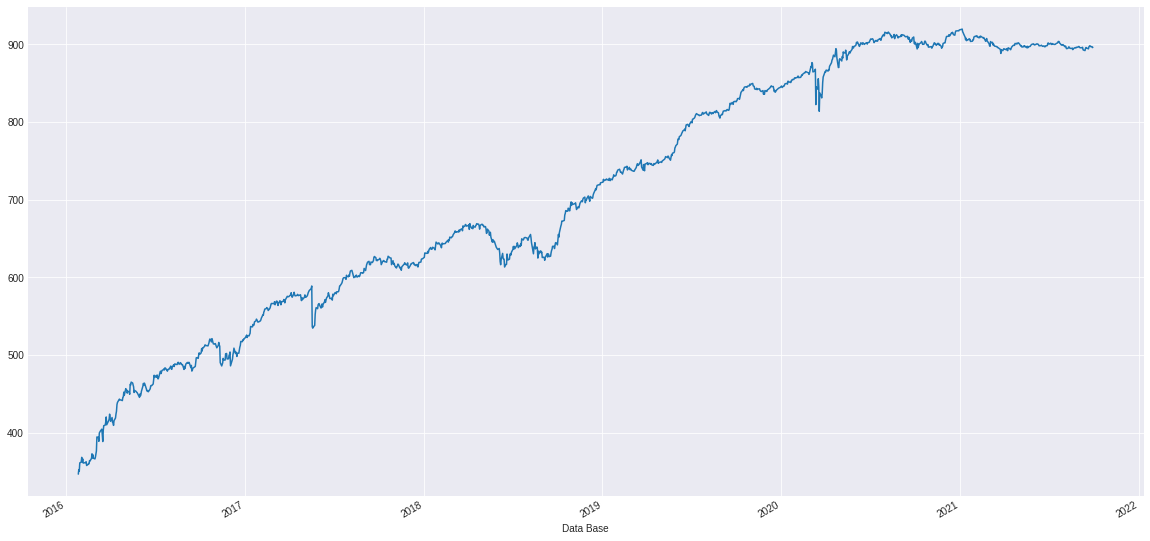

In [26]:
pre2023['PU Compra Manha'].plot();

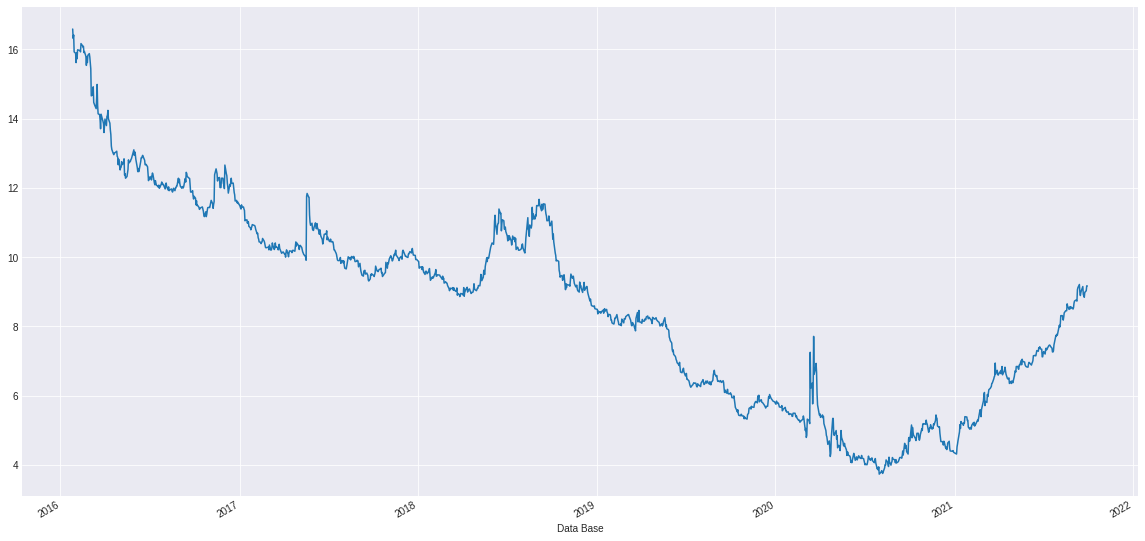

In [27]:
pre2023['Taxa Compra Manha'].plot();

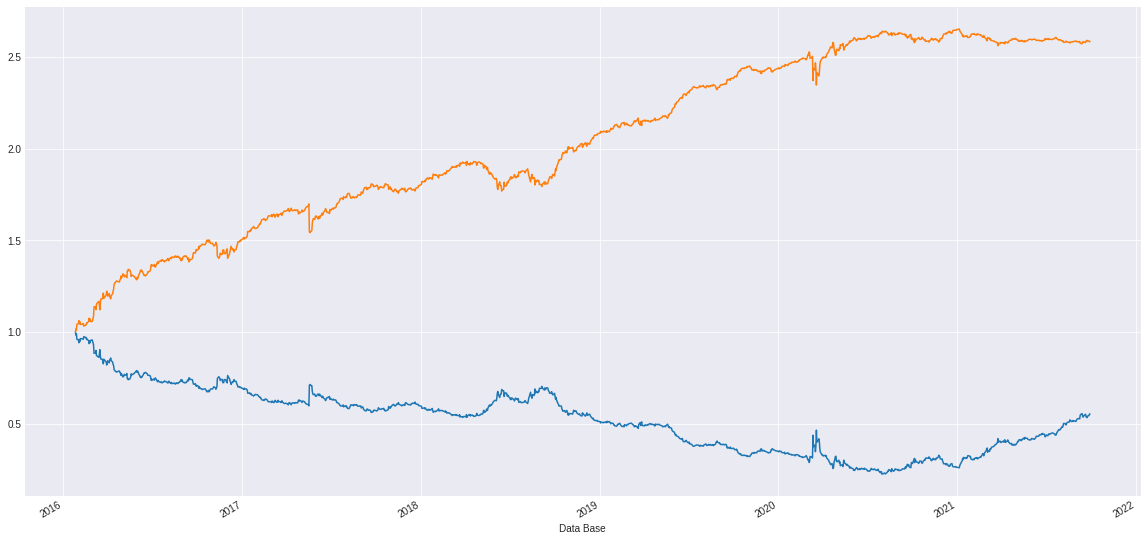

In [28]:
(pre2023['Taxa Compra Manha'] / pre2023['Taxa Compra Manha'].iloc[0]).plot();
(pre2023['PU Compra Manha'] / pre2023['PU Compra Manha'].iloc[0]).plot();

**Pronto!**

Todas as informações foram buscadas no site do Tesouro Direto e já podemos utilizá-las para tomada de decisão sobre os nossos investimentos em Renda Fixa.